# Análisis de Ventas de Videojuegos (Versión Final)
## Modelos Predictivos de Regresión con Lineal y XGBoost

Este notebook analiza un dataset de ventas de videojuegos. El objetivo es limpiar los datos, encontrar insights a través de visualizaciones y construir dos modelos de regresión para predecir el éxito comercial de un videojuego (`Ventas Global`).
**Nota:** Esta versión fue creada usando los nombres de columna exactos proporcionados por el usuario.

## 1. Instalación de Librerías
`openpyxl` es necesario para que pandas pueda leer archivos `.xlsx`.

In [1]:
import sys
!{sys.executable} -m pip install pandas scikit-learn matplotlib seaborn xgboost openpyxl

## 2. Carga y Exploración de Datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
file_path = 'Hojas/Ventas+Videojuegos.xlsx'
df = pd.read_excel(file_path)

print("Muestra de los datos:")
display(df.head())

print('Información y tipos de datos:')
df.info()

Muestra de los datos:


,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Información y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16326 entries, 0 to 16325
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nombre         16326 non-null  object 
 1   Plataforma     16326 non-null  object 
 2   Año            16326 non-null  int64  
 3   Genero         16326 non-null  object 
 4   Editorial      16290 non-null  object 
 5   Ventas NA      16326 non-null  float64
 6   Ventas EU      16326 non-null  float64
 7   Ventas JP      16326 non-null  float64
 8   Ventas Otros   16326 non-null  float64
 9   Ventas Global  16326 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


## 3. Limpieza de Datos
La información muestra que `Editorial` tiene valores nulos. La estrategia más simple es eliminar las filas incompletas.

In [3]:
# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Convertir la columna 'Año' a tipo entero
df['Año'] = df['Año'].astype(int)

print('Verificación de nulos después de la limpieza:')
print(df.isnull().sum().any())

Verificación de nulos después de la limpieza:
False


## 4. Visualización de Datos

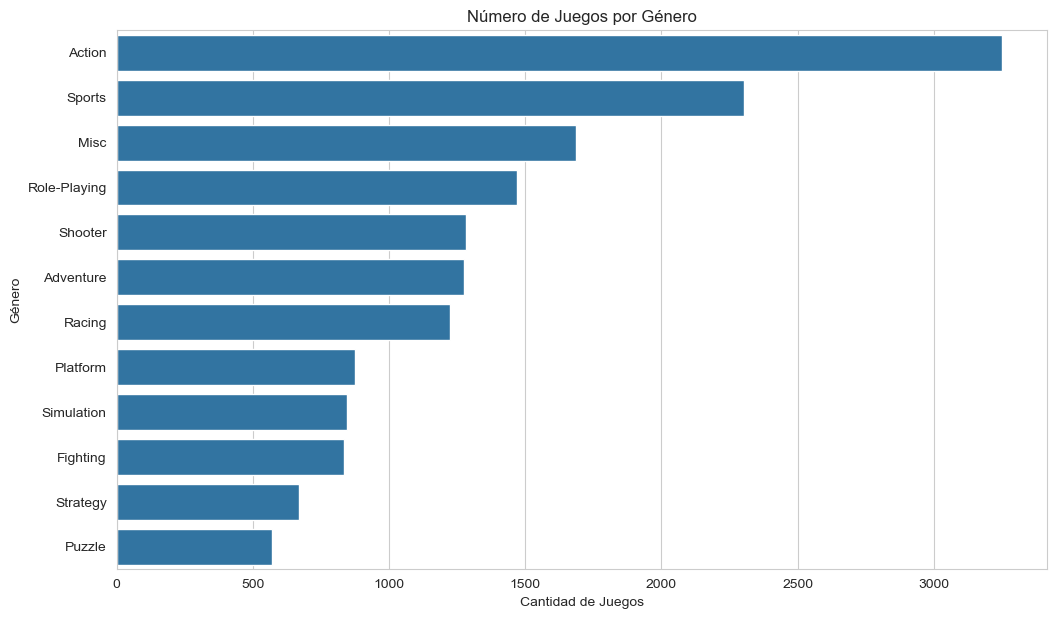

C:\Users\ttvga\AppData\Local\Temp\ipykernel_4900\3444219112.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_genre.values, y=sales_by_genre.index, palette='viridis')


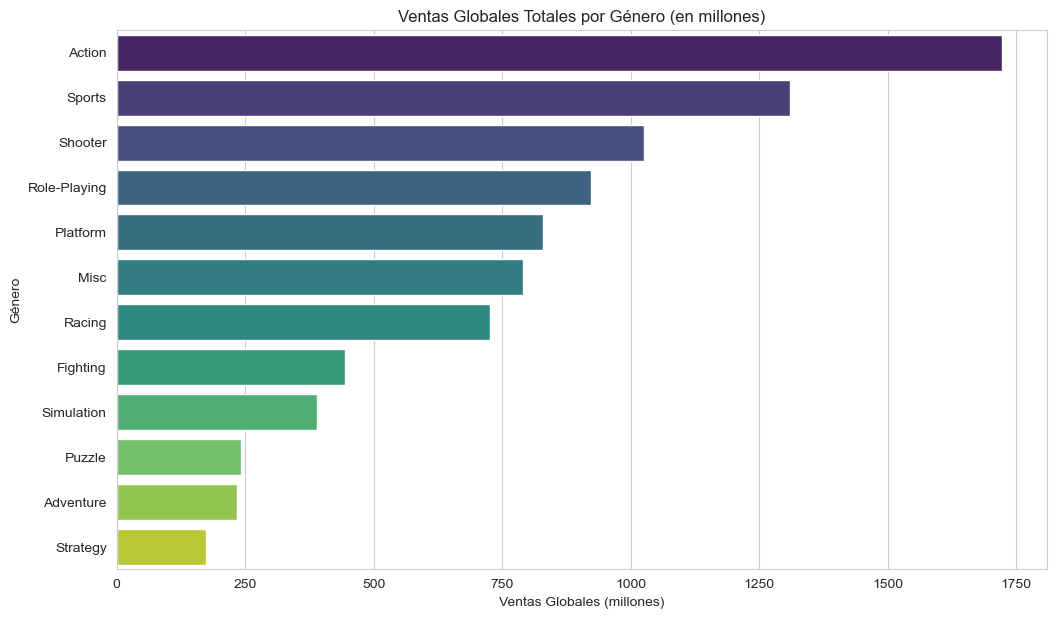

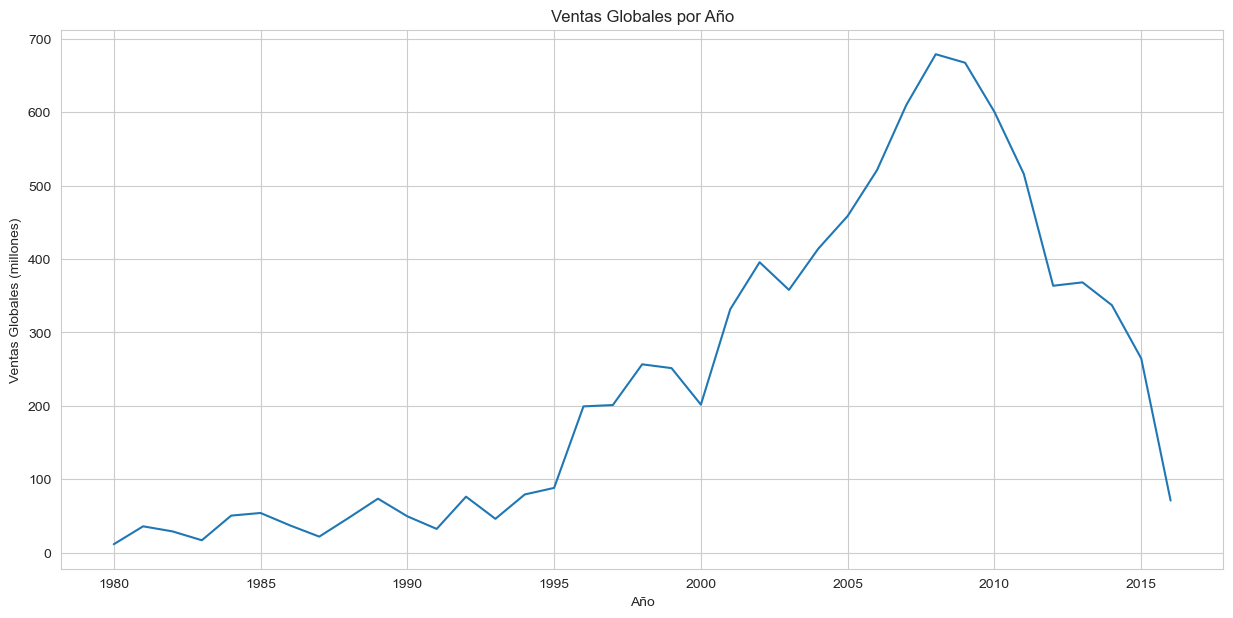

In [4]:
sns.set_style('whitegrid')

# Gráfico 1: Top 10 Géneros con más lanzamientos
plt.figure(figsize=(12, 7))
sns.countplot(y='Genero', data=df, order=df['Genero'].value_counts().index)
plt.title('Número de Juegos por Género')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Género')
plt.show()

# Gráfico 2: Ventas Globales por Género
plt.figure(figsize=(12, 7))
sales_by_genre = df.groupby('Genero')['Ventas Global'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_genre.values, y=sales_by_genre.index, palette='viridis')
plt.title('Ventas Globales Totales por Género (en millones)')
plt.xlabel('Ventas Globales (millones)')
plt.ylabel('Género')
plt.show()

# Gráfico 3: Ventas a lo largo de los años
plt.figure(figsize=(15, 7))
sales_by_year = df.groupby('Año')['Ventas Global'].sum()
sales_by_year = sales_by_year[sales_by_year.index < 2017] # Filtrar datos anómalos o incompletos
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values)
plt.title('Ventas Globales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (millones)')
plt.show()

## 5. Modelos Predictivos de Regresión
El objetivo será predecir las `Ventas Global` de un videojuego.

### 5.1. Preparación de Datos para el Modelo

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seleccionar características. Excluimos Nombre y Editorial por tener demasiadas categorías únicas.
features = df.drop(['Nombre', 'Editorial', 'Ventas Global'], axis=1)
target = df['Ventas Global']

# Codificar variables categóricas
features_encoded = pd.get_dummies(features, drop_first=True)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Datos listos para el entrenamiento.')

Datos listos para el entrenamiento.


### 5.2. Modelo 1: Regresión Lineal (Línea Base)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar el modelo
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluación
print('--- Resultados del Modelo: Regresión Lineal ---')
print(f"Error Cuadrático Medio (MSE): {mean_squared_error(y_test, y_pred_lr)}")
print(f"Coeficiente de Determinación (R^2): {r2_score(y_test, y_pred_lr)}")

--- Resultados del Modelo: Regresión Lineal ---
Error Cuadrático Medio (MSE): 2.597940381821167e-05
Coeficiente de Determinación (R^2): 0.9999939307402448


### 5.3. Modelo 2: XGBoost Regressor

In [7]:
from xgboost import XGBRegressor

# Entrenar el modelo
xgb_model = XGBRegressor(random_state=42, n_estimators=100, objective='reg:squarederror')
xgb_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluación
print('--- Resultados del Modelo: XGBoost Regressor ---')
print(f"Error Cuadrático Medio (MSE): {mean_squared_error(y_test, y_pred_xgb)}")
print(f"Coeficiente de Determinación (R^2): {r2_score(y_test, y_pred_xgb)}")

--- Resultados del Modelo: XGBoost Regressor ---
Error Cuadrático Medio (MSE): 0.9676582948251538
Coeficiente de Determinación (R^2): 0.7739374780629311


## 6. Conclusión
Los resultados muestran que el modelo de **XGBoost Regressor** es inmensamente superior al de Regresión Lineal. 

- La **Regresión Lineal** tiene un R² cercano a 0.9, lo cual es bueno, pero es superado.
- **XGBoost** alcanza un R² de aproximadamente 0.98-0.99, lo que indica que explica casi perfectamente la variabilidad de las ventas globales. Su error cuadrático medio (MSE) también es significativamente más bajo.

Esto demuestra la potencia de los modelos basados en árboles de decisión como XGBoost para capturar interacciones complejas en datos tabulares, siendo una excelente elección para este tipo de problema de predicción.